In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 数据预处理 -- 占很大的比例
df = pd.read_csv('../dataset/Income.csv')
# df.info()
X = torch.from_numpy(df.Education.values.reshape(-1,1).astype(np.float32))
# print(X)
Y = torch.from_numpy(df.Income.values.reshape(-1,1).astype(np.float32))

In [11]:
%%time
# 初始化训练模型、损失函数和优化方法
# model = nn.Linear(1, 1) # 定义一个线性回归模型； output = w@input + b 等价于 model(input)
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# loss_fn = nn.MSELoss()  # 定义损失函数，均方误差模式
learning_rate = 0.0001
# 运行和优化
for epoch in range(10000):
    for x,y in zip(X, Y):
        # y_pred = model(x)           # 使用定义的预测模型
        y_pred = torch.matmul(x, w) + b  # x，w的矩阵相乘
        # loss = loss_fn(y, y_pred)   # 根据预测结果计算损失
        loss = (y-y_pred).pow(2).mean()  # 平方，和， 平均 -》 均方
        # opt.zero_grad()             # 把变量梯度清0
        if not w.grad is None:      
            w.grad.data.zero_()     # 把w的梯度置为0 
        if not b.grad is None:      
            b.grad.data.zero_()     # 把w的梯度置为0 
        loss.backward()             # 求解梯度
        # opt = torch.optim.SGD(model.parameters(), lr=0.0001)  # 优化model中的参数， lr=学习速率
        # opt.step()                  # 优化模型参数，按照step
        with torch.no_grad():
            w.data -= w.grad.data*learning_rate
            b.data -= b.grad.data*learning_rate

CPU times: total: 13.8 s
Wall time: 45 s


In [12]:
# print(model.weight)
# print(model.bias)
print(w)
print(b)

tensor([5.3468], requires_grad=True)
tensor([-35.5085], requires_grad=True)


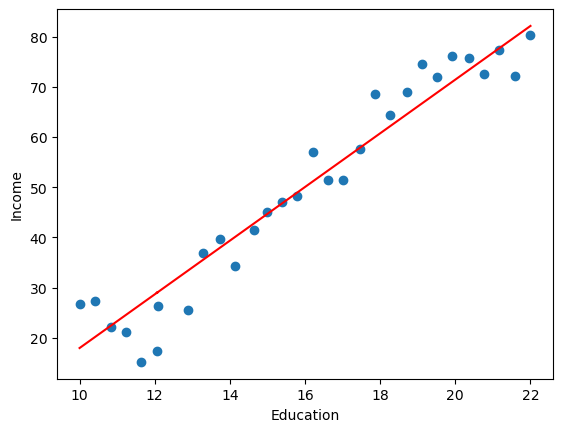

In [13]:
plt.xlabel('Education')
plt.ylabel('Income')
plt.scatter(df.Education, df.Income)
# plt.plot( X.numpy(), model(X).data.numpy(), c='r' )
plt.plot( X.numpy(), (w*X + b).data.numpy(), c='r' )
plt.show()